In [1]:
import solution_file_processing as sfp
import os
import numpy as np
import pandas as pd
from dask import dataframe as dd

from solution_file_processing.utils.utils import catch_errors
from solution_file_processing.utils.write_excel import write_xlsx_column, write_xlsx_stack, STACK_PALETTE, IEA_PALETTE_16, IEA_PALETTE_PLUS, EXTENDED_PALETTE
from solution_file_processing.constants import VRE_TECHS, PRETTY_MODEL_NAMES
from solution_file_processing.timeseries import create_output_11 as create_ts_output_11
from solution_file_processing.timeseries import create_output_4 as create_timeseries_output_4
from solution_file_processing import log
from solution_file_processing.plots import _get_plot_1_variables

# Initialize confi||g with toml file
c = sfp.SolutionFilesConfig('config_files/china/CHN.toml')

# c = sfp.SolutionFilesConfig('config_files/thailand/THA.toml')
ix = pd.IndexSlice  

from solution_file_processing.plots import create_plot_1a, create_plot_2b_ref_plots, create_plot_2, create_plot_10_ts_by_model
from solution_file_processing.plots import create_plot_6_ldc, create_plot_7_co2_savings, create_plot_8_services, create_plot_9_av_cap

[12:37:28 00:00] I:119:__init__ - Logging to C:\Users\hart_c\showcase\solution-file-processing\logs\20240905_123728-CHN.log.
[12:37:29 00:00] I:156:__init__ - Initialized SolutionFilesConfig for config_files/china/CHN.toml.


<Axes: >

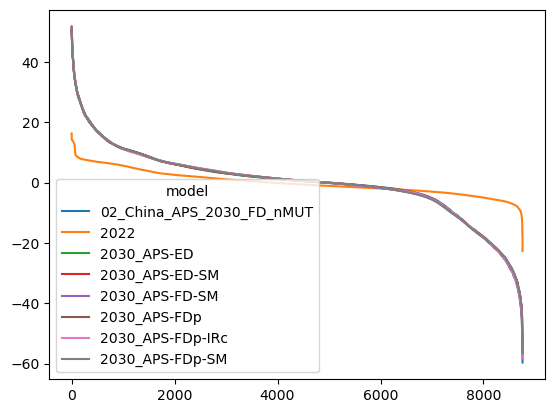

In [4]:
c.v.ramp_pc_dc.plot()

In [ ]:
from zipfile import ZipFile
from pathlib import Path
import os
import fnmatch

def extract_plexos_LT_results(model_path):
    
    if not isinstance(model_path, Path):
        model_path = Path(model_path)

    exp_out_path = model_path / '03_Modelling/01_InputData/08_ExpUnits/'
    lt_solns_path = exp_out_path / 'LT_solution_files/'
    lt_soln_zips = [ lt_solns_path / f for f in  os.listdir(lt_solns_path) if '.zip' in f]

    for z in lt_soln_zips:
        with ZipFile(z, 'r') as zipObj:
            file_list = zipObj.namelist()
            pattern = '* Units.csv'

            filtered_list = []
            for file in file_list:
                if fnmatch.fnmatch(file, pattern):
                    filtered_list.append(file)
            
            for f in filtered_list:
                try:
                    zipObj.extract(f, exp_out_path)
                    print(f'Extracted {f} to {exp_out_path}')
                except PermissionError:
                    print(f'Could not extract {f} to {exp_out_path}. File already exists.')
                    continue
            
            # Create a list of all the extracted files for Generator Units
            # This can then be used to increase the capacity of the units by 5% and integerise the capacity
            exp_units_files = [ exp_out_path / f for f in  os.listdir(exp_out_path) if 'Units.csv' in f]

            for f in exp_units_files:
                df = pd.read_csv(f)
                df['Value'] = df['Value'] * 1.05
                df.loc[df.Name.str.contains('Gas'),'Value'] = df['Value'].apply(np.round)
                try:
                    df.to_csv(f, index=False)
                except PermissionError:
                    print(f'Could not write to {f}. File already exists.')
                    continue


In [ ]:
model_path = Path('Y:/Modelling/Ukraine/2023_UKR_ST_Security/')
extract_plexos_LT_results(model_path=model_path)